# Run this cell to install the required Python packages for this notebook

In [26]:
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Why Linear Regression (LR)?

- Sometimes, we need to predict a continuous quantity (e.g. the price of a house, number of people in a house) based on relevant factors (e.g. square foot, number of bedrooms, location)

- Linear regression is a machine learning algorithm to train a computer to make such predictions accurately

# LR Intuition

Suppose we are predicting the price of a house based off the square foot. If we assume that there is a perfect linear relationship between these two quantities, the graph of price against square foot would look something like this:

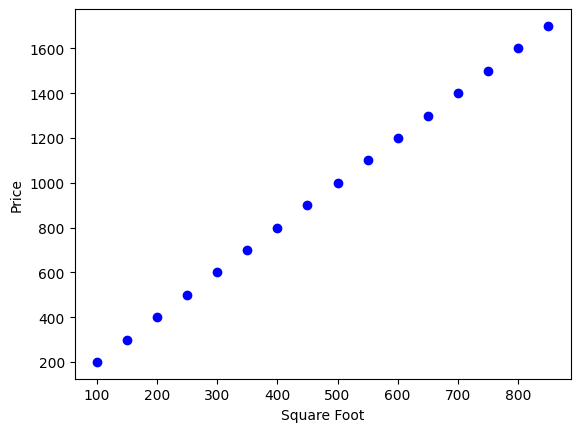

In [6]:
from matplotlib import pyplot  # Import plotting library

square_foots = range(100, 900, 50)  # Example data
prices = [2 * x for x in square_foots]  # price = 2 * square_foot

# Plotting price against square_foot
pyplot.plot(square_foots, prices, 'bo')  # 'bo' tells pyplot to show the points with blue dots
pyplot.xlabel('Square Foot')  # x-axis label 
pyplot.ylabel('Price')  # y-axis label
pyplot.show()

# LR Intuition (Continued)

However, in the real world, the relationship between two quantities is rarely perfectly linear. There is always some random noise, either due to imperfect sampling, or external factors that we are not considering. So, a more realistic relationship between square foot and price would look like this:

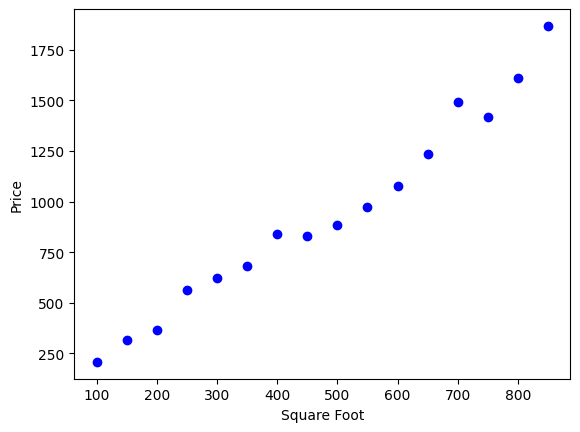

In [19]:
from matplotlib import pyplot  # Import plotting library
import random  # To simulate random noise

square_foots = range(100, 900, 50)  # Example data
prices = [2 * x + random.uniform(-0.25, 0.25) * x for x in square_foots]  # price = 2 * square_foot + random noise

# Plotting price against square_foot
pyplot.plot(square_foots, prices, 'bo')  # 'bo' tells pyplot to show the points with blue dots
pyplot.xlabel('Square Foot')  # x-axis label
pyplot.ylabel('Price')  # y-axis label
pyplot.show()

# LR Intuition (Continued)

In the above graph, we can see that the relationship is not perfectly linear, but it is close enough. The core intuition behind linear regression is that assuming linearity allows us to closely predict the price of a house based on its square foot.

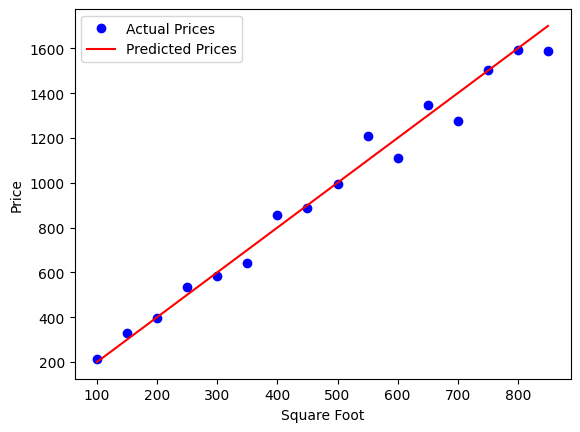

In [23]:
from matplotlib import pyplot  # Import plotting library
import random  # To simulate random noise

square_foots = range(100, 900, 50)  # Example data
prices_actual = [2 * x + random.uniform(-0.25, 0.25) * x for x in square_foots]  # Actual price = 2 * square foot + random noise
prices_approx = [2 * x for x in square_foots]  # Predicted price = 2 * square_foot

# Plotting actual and predicted prices against square foot
pyplot.plot(square_foots, prices_actual, 'bo', label="Actual Prices")  # 'bo' tells pyplot to show the points with blue dots
pyplot.plot(square_foots, prices_approx, 'r', label="Predicted Prices")  # 'r' tells pyplot to show the points with a red line
pyplot.xlabel('Square Foot')  # x-axis label
pyplot.ylabel('Price')  # y-axis label
pyplot.legend()  # Show the line labels
pyplot.show()

# Prediction Loss

Whenever we make a prediction, it is often important (and interesting) to ask how far off the prediction is from the real value. In machine learning, this gap between prediction and reality is called 'loss'. The higher the loss, the further the prediction is from the real value.

There are several ways to calculate the loss of a prediction. In the next cell, we shall see two different types of loss (i.e., two different ways to quantify how far off a prediction is from the real value). They are called 'squared error loss' and 'orthogonal distance loss'. 

<b>Squared error loss (SE)</b> takes the distance in the y-axis between the prediction and the actual point and squares it.

SE = (y_pred - y_actual)<sup>2</sup>

<b>Orthogonal distance loss (OD)</b> takes the perpendicular distance between the actual point and the best fit line (note that the distance is not calculated with respect to a specific prediction, but the best fit line generated from all the predictions)

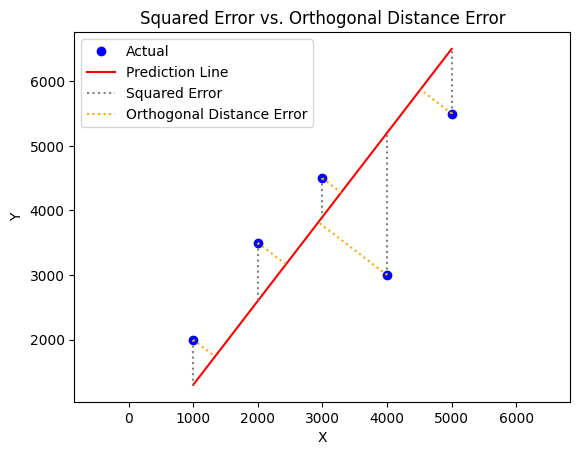

In [118]:
import matplotlib.pyplot as plt  # Plotting library

# Random points
points = np.array([[1000, 2000], [2000, 3500], [3000, 4500], [4000, 3000], [5000, 5500]])
x = points[:, 0]
y = points[:, 1]

# Plotting
plt.title('Squared Error vs. Orthogonal Distance Error')
plt.axis('equal')  # Make x and y axis have same scaling
plt.plot(x, y, 'bo', label="Actual")
plt.plot(x, 1.3 * x, 'r', label="Prediction Line")

# Plot the SE and OD error lines
for i in range(len(points)):
    plt.plot([x[i], x[i]], [y[i], 1.3 * x[i]], linestyle="dotted", color="gray", label="Squared Error" if i == 0 else "")  # Squared Error Line

    # Orthogonal distance calculation
    x1 = x[i]
    y1 = y[i]
    x2 = (1.3 / 2.69) * y1 + (1 / 2.69) * x1
    y2 = 1.3 * x2

    plt.plot([x1, x2], [y1, y2], linestyle="dotted", color="orange", label="Orthogonal Distance Error" if i == 0 else "")  # Orthogonal Distance Line

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

# Impact of loss calculation choice on ML model

Depending on the loss calculation method, the training of a machine learning model can vary, since a model is typically trained to minimize one specific type of loss.

--------------------------------------------------
Orthogonal Distance Loss: Best-fit line is y = 0.87x + 952.96
Squared Error Loss: Best-fit line is y = 0.72x + 1400.00
--------------------------------------------------


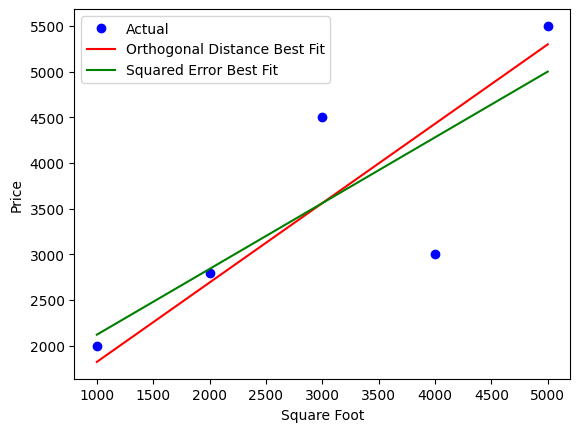

In [121]:
import numpy as np  # To handle array creation
import matplotlib.pyplot as plt  # Plotting library
from scipy.odr import ODR, Model, RealData  # To create best-fit lines for different loss functions

def ModelFit(beta, x):
    """This function represents our prediction for the relationship between input and output. It will be used by the best-fit line generator.

    Since we are assuming linearity, we specify a linear relationship between input and output below (i.e., y = mx + c).

    The scipy ODR class will predict the best values for m and c that minimize either the squared error loss or the orthogonal distance loss (depending on how it is set up).
    """
    return beta[0] + beta[1] * x

# Random (square_foot, price) pairs
points = np.array([[1000, 2000], [2000, 2800], [3000, 4500], [4000, 3000], [5000, 5500]])
square_foot = points[:, 0]
price = points[:, 1]

# Setting up regression (it's ok if this code is not completely clear. What's more important is seeing the two different best fit lines in the graph)
guess_c = 0  # Our initial guess for what c is in y = mx + c 
guess_m = 1.25  # Our initial guess for what m is in y = mx + c
model = Model(ModelFit)
data = RealData(square_foot, price)
regression = ODR(data, model, [guess_c, guess_m], maxit=50000)

# Performing orthogonal distance regression (ODR)
regression.set_job(fit_type=0)  # 0 for explicit ODR, 1 for implicit ODR, 2 for ordinary MSE
odr_output = regression.run()  # Predict parameters m and c
odr_beta = odr_output.beta  # Extract parameters m and c

# Performing mean squared error regression (MSE)
regression.set_job(fit_type=2)  # 0 for explicit ODR, 1 for implicit ODR, 2 for ordinary MSE
mse_output = regression.run()  # Predict parameters m and c
mse_beta = mse_output.beta  # Extract parameters m and c

# Print predicted parameters
print('-' * 50)
print(f'Orthogonal Distance Loss: Best-fit line is y = {odr_beta[1]:.2f}x + {odr_beta[0]:.2f}')
print(f'Squared Error Loss: Best-fit line is y = {mse_beta[1]:.2f}x + {mse_beta[0]:.2f}')
print('-' * 50)

# Plotting predictions and actual points
plt.plot(square_foot, price, 'bo', label='Actual')
plt.plot(x, ModelFit(odr_beta, x), 'r', label='Orthogonal Distance Best Fit')  # Best-fit line that minimizes orthogonal distance loss
plt.plot(x, ModelFit(mse_beta, x), 'g', label='Squared Error Best Fit')  # Best-fit line that minimized squared error loss
plt.xlabel('Square Foot')  # x-axis label
plt.ylabel('Price')  # y-axis label
plt.legend()  # Shows the line labels
plt.show()

# Linear Regression Mathematical Setup

- X<sub>1</sub>, X<sub>2</sub>, ... X<sub>n</sub> - Features (i.e. relevant factors, e.g. car manufacturer, car age, number of doors)

- Y - Label (i.e. the quantity being predicted, e.g., car price)

### Relationship between features and label

- Linear Regression Assumption - Label varies linearly with feature(s)

- <strong>Y = θ<sub>0</sub> + θ<sub>1</sub>X<sub>1</sub> + θ<sub>2</sub>X<sub>2</sub> + ... + θ<sub>n</sub>X<sub>n</sub> + ε</strong>

    - θ<sub>i</sub> - Parameter(s): Gives the exact linear relationship of the label with each feature
    
    - ε - Random Zero-Mean Term: <u>Cannot be predicted</u> exactly; usually to model uncertainty
    
- Goal: Find θ<sub>0</sub>, θ<sub>1</sub>, θ<sub>2</sub>, ... θ<sub>n</sub> <u>as closely as possible</u>

### A more concise representation

- Let, X, θ be vectors in R<sup>n+1</sup> 

    - X = <X<sub>0</sub>, X<sub>1</sub>, X<sub>2</sub>, ... X<sub>n</sub>> where X<sub>0</sub> = 1
    
    - θ = <θ<sub>0</sub>, θ<sub>1</sub>, θ<sub>2</sub>, ... θ<sub>n</sub>>

- Then, <strong>Y = θ<sup>T</sup>X</strong>

# R<sup>2</sup> Score

So far, we have looked at a mathematical representation of the linear regression problem, what loss is and how the type of loss can influence the predictions made by a linear regression model. There is still a question left unanswered, however: after training is done, can we quantify how well the model is predicting future data?

Luckily, there is a helpful metric called R<sup>2</sup> (R-squared score) that can quantify this metric. We will not be delving into the mathematical details of the calculation, but most ML libraries provide a function for automatically calculating the R<sup>2</sup> score for a given set of predictions. We will be using scikit-learn's R<sup>2</sup> function later on.

The maximum R<sup>2</sup> score is 1.0, which indicates the best possible predictions. An R<sup>2</sup> score of 0.0 indicates that the model is disregarding the input features, and we certainly don't want that. Therefore, it indicates the worst possible predictions. For more information, visit the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

# Linear Regression in Python

Python's scikit-learn package offers a LinearRegression class that easily allows us to predict the θ parameters of the best-fit line for any given data. In the following cells, we use an example dataset included in the scikit-learn package, and perform linear regression on it.

## Loading and describing the data

In [136]:
from sklearn.datasets import load_diabetes  # Import dataset

diabetes = load_diabetes(as_frame=True)  # Load dataset
print(diabetes['DESCR'])  # Print dataset description

df = diabetes['data']  # Load the features
df['target'] = diabetes['target']  # Load the label

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Showing the data

In [144]:
df  # Show the data

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

## Train-Test Splitting

In [160]:
df_train = df.sample(frac=0.8, random_state=42)  # 80% of the data will be used to train the model
df_test = df.drop(df_train.index)  # Collects remaining 20% and saves it for testing

# Splitting the training data into respective features and labels (X and y)
X_train = df_train.drop('target', axis=1)
y_train = df_train['target'].copy()

# Doing the same as above for the testing data
X_test = df_test.drop('target', axis=1)
y_test = df_test['target'].copy()

## Training the model

In [165]:
from sklearn.linear_model import LinearRegression  # scikit-learn's Linear regression model

reg = LinearRegression().fit(X_train.values, y_train.values)  # Fit the model on the training data
reg.coef_  # These are the parameters (theta vector) predicted by the model to have the lowest loss after training

array([    5.33090312,  -235.78389174,   500.4856749 ,   275.28785623,
       -1016.96672502,   637.33668394,   186.67545657,   210.32623651,
         878.43250988,    82.29802939])

## Testing the model

In [171]:
y_pred = reg.predict(X_test.values)  # Makes predictions on the testing data

# Print R2 scores for train and test data
print(f'R2 Score on Training Data: {reg.score(X_train.values, y_train):.2f}')  # reg.score uses R2 scores by default
print(f'R2 Score on Testing Data: {reg.score(X_test.values, y_test):.2f}')

R2 Score on Training Data: 0.54
R2 Score on Testing Data: 0.39
